# Final Exam Second Semester 2566 - K-Means (Cancer Patient Problem)


This exam problem has an objective to develop a K-Means algorithm to group cancer patient data into k clusters according to 23 features such as age, gender, air pollution, alcohol use, dust, allergy, occupational, hazards, genetic risk, chronic lung disease, etc.

In [1]:
#import library
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import utils_kmean as utils
from scipy import optimize

### We start the exam by first loading the dataset. 

In [2]:
# Load the dataset into the variable X 
data = np.loadtxt(r'C:\Users\panda\OneDrive\Desktop\fifaaa\Data\KMeans_CancerData.txt')
X = data
m = X.shape[0] # number of training examples

In [3]:
X.shape

(1000, 23)

In [4]:
print(m)

1000


### Set initial centroids

In [5]:
# Initial centroids
# For consistency, here we set centroids to specific values
# but in practice you should generate them automatically, such as by
# settings them to be random examples.

initial_centroids = np.array([[44.,  1.,  2.,  1.,  5.,  3.,  2.,  3.,  2.,  4.,  1.,  4.,  2.,
         4.,  6.,  7.,  2.,  5.,  8.,  1.,  3.,  2.,  3.],
       [35.,  1.,  2.,  1.,  5.,  3.,  2.,  3.,  2.,  4.,  1.,  4.,  2.,
         4.,  6.,  7.,  2.,  5.,  8.,  1.,  3.,  2.,  3.],
       [54.,  1.,  6.,  7.,  7.,  7.,  7.,  6.,  7.,  7.,  7.,  8.,  7.,
         7.,  5.,  3.,  2.,  7.,  8.,  2.,  4.,  5.,  3.],
       [62.,  1.,  6.,  8.,  7.,  7.,  7.,  6.,  7.,  7.,  8.,  7.,  7.,
         9.,  3.,  2.,  4.,  1.,  4.,  2.,  4.,  2.,  3.],
       [24.,  2.,  3.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  4.,  2.,  3.,
         6.,  2.,  1.,  2.,  3.,  4.,  2.,  1.,  1.,  1.]])

In [6]:
def findClosestCentroids(X, centroids): 
    # Set K
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(idx.size):
        J = np.sqrt(np.sum(np.square(X[i] - centroids),axis = 1))
        idx[i] = np.argmin(J)
        
    return idx

In [7]:
K = 3  #number of centroids
initial_centroids = initial_centroids
# Find the closest centroids for the examples using the initial_centroids
idx = findClosestCentroids(X, initial_centroids)
print(idx)

[1 4 1 1 2 1 0 4 1 0 2 3 1 1 4 3 4 1 1 4 4 2 3 1 1 3 1 4 1 1 1 0 1 1 4 4 4
 4 1 0 4 4 0 4 4 0 4 1 4 1 4 4 4 1 1 0 0 2 0 1 3 3 0 0 1 0 0 1 3 1 0 3 1 1
 4 1 4 2 0 1 0 2 0 1 1 1 1 2 1 2 3 2 1 2 1 4 1 1 4 1 2 1 2 1 1 1 1 2 1 4 4
 0 4 4 4 1 1 1 4 1 4 2 3 1 1 4 3 4 1 1 4 4 2 3 1 1 3 1 4 1 1 1 0 1 1 4 1 4
 4 1 0 4 4 0 4 4 0 0 1 4 1 4 4 4 1 1 0 0 1 0 1 3 3 0 0 1 0 0 1 1 1 0 3 1 1
 4 1 4 2 0 4 0 2 0 1 1 1 1 2 1 2 4 2 1 2 1 4 1 1 4 1 2 4 2 1 1 1 1 2 1 4 4
 0 1 1 4 1 1 1 4 1 4 2 3 1 0 4 3 4 1 1 4 4 2 3 1 4 3 1 4 1 1 1 0 1 1 4 4 4
 4 1 0 4 4 0 4 4 0 0 1 4 1 4 4 4 1 1 0 0 4 0 1 3 3 0 0 1 0 0 1 4 1 0 3 1 1
 4 1 4 2 0 0 0 2 0 1 1 1 1 2 1 2 1 2 1 2 1 4 1 1 4 1 2 4 2 1 1 1 1 2 1 4 4
 0 4 1 4 1 1 1 4 1 4 2 3 1 4 4 3 4 1 1 4 4 2 3 1 4 3 1 4 1 1 1 0 1 1 4 4 4
 4 1 0 4 4 0 4 4 0 1 1 4 4 1 0 0 0 1 0 0 1 0 1 3 3 0 0 1 0 0 1 0 1 0 3 0 1
 1 1 4 2 0 0 0 2 0 0 0 1 0 2 1 2 0 3 0 2 1 1 1 1 4 1 2 1 2 1 1 1 1 2 1 1 4
 0 2 3 4 1 1 1 4 1 4 2 3 1 3 4 3 4 1 1 4 4 2 3 1 0 3 1 4 1 1 1 0 1 1 4 0 4
 4 1 0 4 4 0 4 4 0 1 1 4 

In [8]:
#computing centroids mean
def computeCentroids(X, idx, K): 
    m, n = X.shape
    centroids = np.zeros((K, n))
    for i in range(K):
        centroids[i] = np.mean(X[idx == i], axis = 0)
    return centroids

In [9]:
# Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K)
print('Centroids computed after initial finding of closest centroids:')
print(centroids)

Centroids computed after initial finding of closest centroids:
[[46.70348837  1.40116279  2.53488372  2.85465116  3.61046512  3.52906977
   3.23255814  3.62209302  3.09302326  3.04069767  3.15697674  3.
   3.05232558  3.39534884  3.55232558  4.01744186  3.70348837  3.39534884
   4.09883721  4.05232558  3.46511628  3.54651163  3.03488372]
 [34.21182266  1.42857143  3.93103448  4.99753695  5.70935961  5.19458128
   4.88669951  4.62561576  4.92118227  5.00492611  4.10837438  4.7044335
   4.74876847  5.36206897  4.31773399  4.30788177  4.52216749  4.13054187
   4.25123153  4.1453202   3.99753695  4.07389163  3.03448276]
 [47.32407407  1.26851852  5.35185185  6.89814815  6.81481481  6.72222222
   6.55555556  5.7037037   6.35185185  6.42592593  5.16666667  5.87962963
   6.40740741  7.12962963  4.62037037  3.83333333  4.89814815  3.99074074
   4.10185185  3.36111111  3.77777778  4.64814815  2.92592593]]


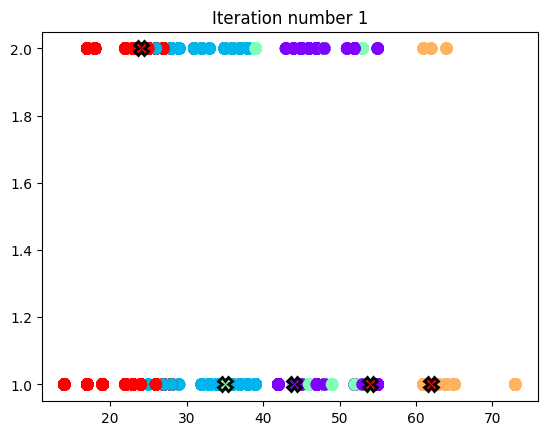

In [10]:
#K-means on example dataset
# Load an example dataset

data = np.loadtxt(r'C:\Users\panda\OneDrive\Desktop\fifaaa\Data\KMeans_CancerData.txt')
X = data
# Settings for running K-Means
K = 3 #change
max_iters = 100 #change

# For consistency, here we set centroids to specific values
initial_centroids = initial_centroids 

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx, anim = utils.runkMeans(X, initial_centroids,
                                       findClosestCentroids, computeCentroids, max_iters, True)
anim

In [11]:
#Randomize initialization
def kMeansInitCentroids(X, K):
    m, n = X.shape
    # You should return this values correctly
    centroids = np.zeros((K, n))
    randidx = np.random.permutation(X.shape[0]) 
    # Take the first K examples as centroids
    centroids = X[randidx[:K], :]
    return centroids

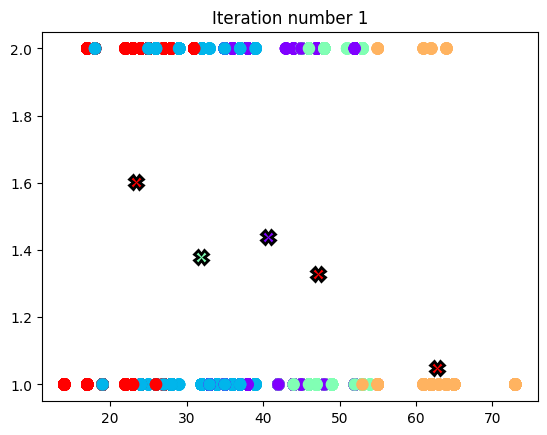

In [13]:
#K-means on example dataset
# Load an example dataset

data = np.loadtxt(r'C:\Users\panda\OneDrive\Desktop\fifaaa\Data\KMeans_CancerData.txt')
X = data
# Settings for running K-Means
K = 3
max_iters = 100

centroids, idx, anim = utils.runkMeans(X, centroids,
                                       findClosestCentroids, computeCentroids, max_iters, True)
anim